# Лекция 6. Работа с файлами: чтение и запись. Обработка исключений

Друзья, мы с вами прошли бОльшую часть базовой информации по программированию на Python: знаем про типы данных и переменные, умеем работать с разными структурами данных, строить простые и сложные условные конструкции, использовать циклы и писать функции с разным количеством аргументов. Нам еще предстоит узнать несколько важных штук, без которых программировать на Python было бы очень сложно, но уже с тем багажом знаний, которым вы располагаете, можно писать программы.

Но давайте двигаться дальше – сегодня мы с вами поговорим про работу с файлами. Речь пойдет именно о чтении и записи файлов – исполнение файлов это отдельная тема, и она нас пока не сильно интересует. А еще в конце мы научимся формировать и обрабатывать ошибки. Погнали!

## Чтение файлов

Первая и самая главная операция с файлами – чтение. И Python это конечно же умеет делать. Но сначала маленькое отступление – файлы бывают разные, в целом их можно разделить на _текстовые_ и _бинарные_. Первые называют человекочитаемыми, мы можем посмотреть на них и прочитать информацию, которая в них записана. Вторые же – исплючительно машиночитаемые. Это файлы, которые записаны в специальной кодировке, которую умеют читать и понимать компьютеры.

Мы с вами пока что будем работать только с _текстовыми_ файлами. К ним можно отнести, например, программу на Python, файл Word или Excel.

Открыть файл можно с помощью встроенной функции `open()`.

In [12]:
f = open('06_text_file.txt')
s = f.read()

f.close()

In [13]:
print(s)

Это текстовый файл, который мы откроем в шестой лекции.
Он состоит из нескольких строк.
Например, вот это уже третья строка.
Это четвертая.
Пятая.
Шестая.
И седьмая. Для начала, пожалуй, достаточно строк :)


Что же произошло? С помощью `open()` мы открыли файл с названием `06_text_file` и расширением `.txt`, который лежит в _текущей_ директории – то есть в той же папке, где находится и этот блокнот.

Узнать, _в какой директории мы находимся сейчас можно вот так:_

In [14]:
import os

os.getcwd()

'/home/instructor/programming_for_dj/lectures'

Но давайте вернемся к нашему файлу – функция `open()` открыла нам файл и вернула объект типа `file`, который мы положили в переменную `f`. Дальше мы вызвали метод `read()` у этого объекта и положили результат в переменную `s`. В `s` у нас теперь лежит большая строка – все, что было записано в прочитанном нами файле в виде одной огромной строковой переменной.

In [15]:
type(s)

str

Действительно, строка!

_Обратите внимание – в конце мы еще написали `f.close()`, чтобы закрыть прочитанный нами файл. Закрывать файоы правильно и хорошо по двум причинам:_

1. Пока ваша программа держит файл открытым, его не могут открыть другие программы
2. Пока ваша программа держит файл открытым, он находится в оперативной памяти. Если файл большой, это может плохо сказываться на скорости работы вашего компьютера.

С помощью `read()` мы можем считать все содержимое файла в одну большущую строковую переменную. Но это не всегда удобно, особенно если файл большой. Поэтому существуют другие варианты. Например, можно считать все строки файла и получить их в виде списка с помощью метода `readlines()`.

In [19]:
f = open('06_text_file.txt')
lines = f.readlines()

f.close()

In [20]:
print(lines)

['Это текстовый файл, который мы откроем в шестой лекции.\n', 'Он состоит из нескольких строк.\n', 'Например, вот это уже третья строка.\n', 'Это четвертая.\n', 'Пятая.\n', 'Шестая.\n', 'И седьмая. Для начала, пожалуй, достаточно строк :)']


Мы получили список строк. Обратите внимание, что в конце каждого элемента этого списка (строки) стоит знак `\n`. Он означает перенос строки, и поскольку в файле было несколько строк, мы считали их именно так – вместе с переносами.

Теперь можем пробежаться по полученному списку в цикле и посмотреть на каждую из строк:

In [21]:
for line in lines:
    print(line)

Это текстовый файл, который мы откроем в шестой лекции.

Он состоит из нескольких строк.

Например, вот это уже третья строка.

Это четвертая.

Пятая.

Шестая.

И седьмая. Для начала, пожалуй, достаточно строк :)


Но и этот способ подходит для относительно небольших файлов. Если же вам нужно считать реально большой объем информации, лучше итерироваться сразу по объекту файла.

Этот способ позволяет не считывать весь файл сразу и формировать из него список, а читать отдельно по одной строке. Одна срочка файла весит гораздо меньше, чем весь файл целиком.

In [28]:
f = open('06_text_file.txt')
for line in f:
    print(line, end='')

f.close()

Это текстовый файл, который мы откроем в шестой лекции.
Он состоит из нескольких строк.
Например, вот это уже третья строка.
Это четвертая.
Пятая.
Шестая.
И седьмая. Для начала, пожалуй, достаточно строк :)

Но есть нюансы. Если мы попробуем проитерироваться по открытому файлу второй раз, то не получим ничего. Смотрите сами

In [31]:
f = open('06_text_file.txt')
print('====Первый цикл====')
for line in f:
    print(line, end='')
    
print('\n====Второй цикл====')
for line in f:
    print(line, end='')

f.close()

====Первый цикл====
Это текстовый файл, который мы откроем в шестой лекции.
Он состоит из нескольких строк.
Например, вот это уже третья строка.
Это четвертая.
Пятая.
Шестая.
И седьмая. Для начала, пожалуй, достаточно строк :)
====Второй цикл====


Код для второго цикла написан, но ни одна строчка повторно не напечаталась. В чем же дело?

На самом деле все просто – когда мы итерируемся по объекту файла, то каждый раз запоминаем позицию на которой находимся в файле и при следующей итерации сдвигаемся на одну позицию вперед. В самом начале позиция указывает на начало файла, а когда мы доходим до его конца – на конец. И обратно сама по себе она не сдвигается. 

То есть в тот момент, когда мы запускаем второй цикл, позиция уже указывает на конец файла, а значит, непрочитанных строк в нем больше нет. Поэтому во второй цикл наша программа не входит.

_В этом отличие итерации по объекту файла от итерации по списку строк_.

Но мы можем легко сдвинуть позицию обратно на начало файла вручную. Для этого нам понадобится метод `seek()`.

In [32]:
f = open('06_text_file.txt')
print('====Первый цикл====')
for line in f:
    print(line, end='')

f.seek(0)
print('\n====Второй цикл====')
for line in f:
    print(line, end='')

f.close()

====Первый цикл====
Это текстовый файл, который мы откроем в шестой лекции.
Он состоит из нескольких строк.
Например, вот это уже третья строка.
Это четвертая.
Пятая.
Шестая.
И седьмая. Для начала, пожалуй, достаточно строк :)
====Второй цикл====
Это текстовый файл, который мы откроем в шестой лекции.
Он состоит из нескольких строк.
Например, вот это уже третья строка.
Это четвертая.
Пятая.
Шестая.
И седьмая. Для начала, пожалуй, достаточно строк :)

### Маленькое отступление: немного про формат CSV

Возможно, у вас сложилось впечателение, что чтение текстовых файлов – какая-то не очень понятная штука. Ну есть она, и есть. А зачем нам читать текстовые файлы?

На самом же деле, чаще всего для решения практических задач вы будете пользоваться не обычными текстовыми файлами, а файлами в формате `.csv`. Это такой формат представления табличных данных в виде текста, где в качестве разделителя колонок используются запятые.

Например, давайте считаем вот такой файл с информацией о количестве тропических циклонов по месяцам в период с 2005 по 2015 годы:

In [33]:
f = open('hurricanes.csv')
lines = f.readlines()

f.close()

In [34]:
len(lines)

10

In [36]:
for line in lines:
    print(line)

"Month", "Average", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"

"May",  0.1,  0,  0, 1, 1, 0, 0, 0, 2, 0,  0,  0  

"Jun",  0.5,  2,  1, 1, 0, 0, 1, 1, 2, 2,  0,  1

"Jul",  0.7,  5,  1, 1, 2, 0, 1, 3, 0, 2,  2,  1

"Aug",  2.3,  6,  3, 2, 4, 4, 4, 7, 8, 2,  2,  3

"Sep",  3.5,  6,  4, 7, 4, 2, 8, 5, 2, 5,  2,  5

"Oct",  2.0,  8,  0, 1, 3, 2, 5, 1, 5, 2,  3,  0

"Nov",  0.5,  3,  0, 0, 1, 1, 0, 1, 0, 1,  0,  1

"Dec",  0.0,  1,  0, 1, 0, 0, 0, 0, 0, 0,  0,  1





Действительно, похоже на таблицу. Первая строка – заголовочная, в ней содержится описание колонок. Последующие строки – непосредственно данные – количество ураганов, зафиксированное по всему миру в каждый из месяцев по годам и среднее значение в каждый из месяцев за все эти годы.

_Дальше будет небольшая магия, которой вы тоже обязательно научитесь. Пока просто предлагаю посмотреть, что в Python считывать данные в формате CSV и работать с ними дальше – очень удобно.

In [40]:
import pandas as pd

f = open('hurricanes.csv')
df = pd.read_csv(f)

f.close()

In [41]:
df

,Month,"""Average""","""2005""","""2006""","""2007""","""2008""","""2009""","""2010""","""2011""","""2012""","""2013""","""2014""","""2015"""
0,May,0.1,0,0,1,1,0,0,0,2,0,0,0
1,Jun,0.5,2,1,1,0,0,1,1,2,2,0,1
2,Jul,0.7,5,1,1,2,0,1,3,0,2,2,1
3,Aug,2.3,6,3,2,4,4,4,7,8,2,2,3
4,Sep,3.5,6,4,7,4,2,8,5,2,5,2,5
5,Oct,2.0,8,0,1,3,2,5,1,5,2,3,0
6,Nov,0.5,3,0,0,1,1,0,1,0,1,0,1
7,Dec,0.0,1,0,1,0,0,0,0,0,0,0,1


<AxesSubplot:>

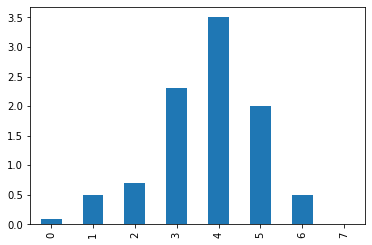

In [62]:
%matplotlib inline
df[' "Average"'].plot.bar()

В общем, чтение файлов – классный инструмент, который вы _точно_ не раз будете использовать :)

## Запись файлов

А теперь возвращаемся обратно. Файлы можно не только читать, но и записывать.

Чтобы _открыть файл на запись_, нужно передать в функцию `open()` передать второй аргумент – режим, в котором мы будем открывать файл. Вообще, таких режимов есть несколько, нас в данном случае интересуют два режиме – `r` - режим чтения (read) и `w` – режим записи (write).

_Режим чтения является режимом по умолчанию, то есть если вы не передаете режим при открытии файла, он откроется в режиме чтения_.

Давайте запишем какую-нибудь строчку в файл. Например, строчку `'I love Python!'`.

In [63]:
f = open('python.txt', 'w')
f.write('I love Python!\n')
f.close()

Интересно, а прочитать сможем?

In [64]:
f = open('python.txt')
print(f.read())

f.close()

I love Python!



_Обратите внимание! В режиме `w` файл открывается именно на новую запись. То есть если у вас уже был файл с таким названием, то он будет удален и перезаписан. Никаких предупреждений вы при этом не получите, так что будьте аккуратны_.

In [65]:
f = open('python.txt', 'w')
f.write('I love С++!\n')
f.close()

f = open('python.txt')
print(f.read())

f.close()

I love С++!



Файл был перезаписан!

Но есть и еще один режим – `a`. Он позволяет _дописывать строку в конец файла, если он уже существует, или создавать новый файл, если файла с таким названием еще нет_.

In [66]:
f = open('python.txt', 'a')
f.write('I still love Python!\n')
f.close()

f = open('python.txt')
print(f.read())

f.close()

I love С++!
I still love Python!



In [67]:
f = open('golang.txt', 'a')
f.write('I love Golang!\n')
f.close()

f = open('golang.txt')
print(f.read())

f.close()

I love Golang!



## Конструкция with...as

Я уже рассказал вам, почему открытые файлы нужно обязательно закрывать. Если вы используете просто функцию `open()`, то делать это нужно вручную, каждый раз добавляя `f.close()`. Но в Python есть более удобный способ это сделать – конструкция `with...as`. Давайте разберемся, как она работает.

In [70]:
with open('golang.txt') as f:
    print('Внутри конструкции with мы можем считать файл')
    print(f.read())
    
print('А вне этой конструкции уже нет - файл закрыт')
print(f.read())

Внутри конструкции with мы можем считать файл
I love Golang!

А вне этой конструкции уже нет - файл закрыт


ValueError: I/O operation on closed file.

Буквально конструкция `with A as B` звучит как `используя А как переменную B` – дальше двоетичое и блок с инструкцией, что с этим всем надо сделать.

Такая конструкция _гарантирует нам, что открытый файл будет закрыт_. И не надо руками писать `f.close()`. Пример выше это отлично демонстрирует – внутри конструкции `with` файл открыт, и мы можем прочитать его. А за ее пределами при чтении мы получаем ошибку `I/O operation on closed file`, что говорит нам о том, что мы пытаемся прочитать закрытый файл.

## Исключения и их обработка

Любой, абсолютно любой код может отработать с ошибкой. К этому может приводить неправильная логика программы, аргументы не того типа да и еще множество всего. Самое главное, что эти ошибки мы можем отлавливать и обрабатывать. Для сигнализирования программисту об ошибках в Python существует специальный тип – исключение или `Exception`.

Все мы с вами еще со школьных времен знаем, что делить на ноль нельзя. Но что будет, если все-таки взять и поделить? Возможно, если бы в Python не было исключений, на месте вашего компьюьтера образовалась бы черная дыра, в которую засосало бы всю Землю. Но нет :)

In [71]:
1 / 0

ZeroDivisionError: division by zero

О чем говорит нам это сообщение из цветных букв? Оно состоит из нескольких строк с информацией о произошедшей ошибке. Например, показана строка кода, где эта ошибка произошла. Если бы эта ошибка была вызвана неправильной работой функции, то мы бы увидели и ее название, но самое главное для нас – последняя строчка. Именно там содержится название ошибки: `ZeroDivisionError` и краткое описание произошедшего – `division by zero`. Оказывается делить на ноль все-таки нельзя :)

На самом деле, исключений существует довольно много и перечислять их все мы, конечно же, не будем. Но некоторые все же посмотрим. Например, вот тут Python ругается, что нельзя сложить строку с числом, показывая исключение `TypeError`:

In [72]:
'a' + 1

TypeError: can only concatenate str (not "int") to str

А вот тут говорит, что строку `abc` нельзя преобразовать с число:

In [73]:
int('abc')

ValueError: invalid literal for int() with base 10: 'abc'

Когда программа ловит исключение, ее выполнение прекращается. Это замечательно, но ведь существуют ситуации, когда мы бы хотели просто обработать исключение, например, выведя на экран сообщение об ошибке и продолжить выполнение программы. И такая возможность у нас есть :)

Для этого существует конструкция `try...except`.

In [74]:
try:
    1 / 0
except ZeroDivisionError:
    print('Поделили на ноль :(')

Поделили на ноль :(


Эта конструкция позволяет нам отлавливать определенные ошибки и определять поведение программы при их возникновении. Например, в коде выше мы сказали, что в случае возникновения ошибки деления на ноль, хотим вывести на экран грустное сообщение `Поделили на ноль :(`.

В общем виде конструкция `try...except` выглядит следующим образом:

```
try:
    блок кода, который надо выполнить
catch Тип ошибка
    блок кода, который надо выполнить, если произошла ошибка с заданным типом
```

...или если совсем просто: `попробуй сделать вот это, но если получишь такую ошибку, то сделай вот это`.

Например, у нас может быть функция, которая делит одно число на другое. В такой функции мы хотим обрабатывать деление на ноль и возвращаеть делимое в этом случае.

In [78]:
def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        return a

divide(2, 0)

2

Мы можем написать несколько инструкций для обработки для разных типов ошибок. Например, в нашу функцию еще могут передать вообще не число. Такие ситуации нам бы тоже хорошо предусмотреть.

In [79]:
def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        return a
    except TypeError:
        return 0

divide('a', 2)

0

А еще мы можем отлавливать вообще все ошибки

In [80]:
def divide(a, b):
    try:
        return a / b
    except:
        return 'error'

divide('a', 2)

'error'

_Хм. А что если нам нужно самим сформировать какую-то ошибку?_

Да, действительно, в вашей программе может быть место, в котором вы бы хотели "выбросить" исключение. И это в Python можно сделать с помощью выражения `raise Exception`. Давайте еще модифицируем нашу функцию – вообще-то мы и сами можем проверить, что один из входных аргументов не число и сами поднять исключение. Давайте так и сделаем.

In [87]:
def divide(a, b):
    if type(a) != int and type(a) != float or type(b) != int and type(b) != float:
            raise Exception('wrong value')

    try:
        return a / b
    except:
        return 'error'

5.0

In [88]:
divide(10, 2)

5.0

In [89]:
divide('a', 2)

Exception: wrong value